**Introduction to Data Science with Python**<br/>
Prof. Dr. Jan Kirenz <br/>
Hochschule der Medien Stuttgart

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot') # define plot style 
import seaborn as sns  
sns.set() # seaborne standard settings
from IPython.display import Image # display image in the frontend

**Module overview**:
  * **NumPy** provides efficient storage and computation for multidimensional data arrays. 
  * **Pandas** provides a DataFrame object along with a powerful set of methods to manipulate, filter, group, and transform data.
statistical models, as well as for conducting statistical tests, and statistical data exploration. Furthermore, you can use R-style formulas together with pandas data frames to fit your models.
  * **Matplotlib** provides a useful interface for creation of publication-quality plots and figures. 
  * **Seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

# Data Science Programming Process

The goal of this application is to give you a first impression of the most important steps and tools in Python when you perform a data science project. 

To demonstrate the programming process, we examine a data set which contains factors that could relate to **wages** for a group of males from the Atlantic region of the United States. The data set is obtained from James et al (2013) and consists of 12 variables for 3,000 people, so we have n = 3,000 observations and p = 12 variables (such as year, age, and more).
  
Tasks:
  
  1. Review and load the Python modules to start your first data analysis. 
  2. Get familiar with the programming process. 
  3. Change the code in chapter 1 and import your data.
  4. Execute the code blocks in the notebook (chapter 2). 
  5. Perform the data transformation steps (chapter 3) and visualizations (chapter 4) for variable "age" and use it as a template for the variables "wage" and "year" (copy the code examples and compute the statistics for wage and year). In particular, check for possible relationships between the variables (chapter 4.2) 

---

*Sources*

[*James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning. New York: Springer.*](https://r4ds.had.co.nz/index.html)

[*Wickham, H., & Grolemund, G. (2016). R for data science: import, tidy, transform, visualize, and model data. O'Reilly Media, Inc.*](http://www-bcf.usc.edu/~gareth/ISL/)

---

## Programming Process

Our model of the tools needed in a typical data science project looks something like this (Wickham/Grolemund, 2016):

![title](https://d33wubrfki0l68.cloudfront.net/571b056757d68e6df81a3e3853f54d3c76ad6efc/32d37/diagrams/data-science.png)


### Import data
First you must **import** your data into Python. This typically means that you take data stored in a file, database, or web API, and load it into a DataFrame in Python (using pandas). 

### Tidying data
Once you’ve imported your data, it is a good idea to tidy it. **Tidying** your data means storing it in a consistent form that matches the semantics of the dataset with the way it is stored. In brief, when your data is tidy, each column is a variable, and each row is an observation. Tidy data is important because the consistent structure lets you focus your struggle on questions about the data.

### Transform data
Once you have tidy data, a common first step is to transform it. **Transformation** includes narrowing in on observations of interest (like all people in one city, or all data from the last year), creating new variables that are functions of existing variables (like computing velocity from speed and time), and calculating a set of summary statistics (like counts or means). Together, tidying and transforming are called wrangling, because getting your data in a form that’s natural to work with often feels like a fight!

### Visualize data
Once you have tidy data with the variables you need, there are two main engines of knowledge generation: visualisation and modelling. These have complementary strengths and weaknesses so any real analysis will iterate between them many times.

**Visualisation** is a fundamentally human activity. A good visualisation will show you things that you did not expect, or raise new questions about the data. A good visualisation might also hint that you’re asking the wrong question, or you need to collect different data. Visualisations can surprise you, but don’t scale particularly well because they require a human to interpret them.

### Models
**Models** are complementary tools to visualisation. Once you have made your questions sufficiently precise, you can use a model to answer them. Models are a fundamentally mathematical or computational tool, so they generally scale well. But every model makes assumptions, and by its very nature a model cannot question its own assumptions. That means a model cannot fundamentally surprise you.

### Communication
The last step is **communication**, an absolutely critical part of any data analysis project. It doesn’t matter how well your models and visualisation have led you to understand the data unless you can also communicate your results to others.

Surrounding all these tools is **programming**. Programming is a cross-cutting tool that you use in every part of the project. You don’t need to be an expert programmer to be a data scientist, but learning more about programming pays off because becoming a better programmer allows you to automate common tasks, and solve new problems with greater ease.

Source: Wickham & Grolemund, 2016

---

## Import data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/wage.csv')

In [3]:
df.head(5)

Unnamed: 0  year  age            maritl      race        education  \
0      231655  2006   18  1. Never Married  1. White     1. < HS Grad   
1       86582  2004   24  1. Never Married  1. White  4. College Grad   
2      161300  2003   45        2. Married  1. White  3. Some College   
3      155159  2003   43        2. Married  3. Asian  4. College Grad   
4       11443  2005   50       4. Divorced  1. White       2. HS Grad   

               region        jobclass          health health_ins   logwage  \
0  2. Middle Atlantic   1. Industrial       1. <=Good      2. No  4.318063   
1  2. Middle Atlantic  2. Information  2. >=Very Good      2. No  4.255273   
2  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes  4.875061   
3  2. Middle Atlantic  2. Information  2. >=Very Good     1. Yes  5.041393   
4  2. Middle Atlantic  2. Information       1. <=Good     1. Yes  4.318063   

         wage  
0   75.043154  
1   70.476020  
2  130.982177  
3  154.685293  
4   75.043154

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3000 non-null   int64  
 1   year        3000 non-null   int64  
 2   age         3000 non-null   int64  
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  logwage     3000 non-null   float64
 11  wage        3000 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 281.4+ KB


## Tidying data

### Data inspection

First of all, let's take a look at the variables (columns) in the data set.

In [5]:
# show all variables in the data set
df.columns

Index(['Unnamed: 0', 'year', 'age', 'maritl', 'race', 'education', 'region',
       'jobclass', 'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [6]:
# show the first 5 rows (i.e. head of the DataFrame)
df.head(5)

Unnamed: 0  year  age            maritl      race        education  \
0      231655  2006   18  1. Never Married  1. White     1. < HS Grad   
1       86582  2004   24  1. Never Married  1. White  4. College Grad   
2      161300  2003   45        2. Married  1. White  3. Some College   
3      155159  2003   43        2. Married  3. Asian  4. College Grad   
4       11443  2005   50       4. Divorced  1. White       2. HS Grad   

               region        jobclass          health health_ins   logwage  \
0  2. Middle Atlantic   1. Industrial       1. <=Good      2. No  4.318063   
1  2. Middle Atlantic  2. Information  2. >=Very Good      2. No  4.255273   
2  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes  4.875061   
3  2. Middle Atlantic  2. Information  2. >=Very Good     1. Yes  5.041393   
4  2. Middle Atlantic  2. Information       1. <=Good     1. Yes  4.318063   

         wage  
0   75.043154  
1   70.476020  
2  130.982177  
3  154.685293  
4   75.043154

The variable "Unnamed: 0" seems to be some kind of identification number per employee. Let's rename the variable and check wether we have duplictes in our dataset.

In [7]:
# rename variable "Unnamed: 0"
df = df.rename(index=str, columns={"Unnamed: 0": "id"})

In Jupyter, we have several options to present output. One way is to just run a cod block which produces only one output:

In [8]:
# show the lenght of the variable id (i.e. the number of observations)
len(df["id"])

3000

If we need to present multiple outputs or add some text, we can use the print() function. See the [Python documentation](https://docs.python.org/3/tutorial/inputoutput.html) for the different print() options. 

In [9]:
# check for duplicates and print results (if the two numbers match, we have no duplicates)
# show the lenght of the variable id (i.e. the number of observations)
print(f'IDs: {len(df["id"])}')
# count the number of individual id's
print(f'Unique IDs: {len(df["id"].value_counts())}')

IDs: 3000
Unique IDs: 3000


Since we already decided to only use a specific set of variables (wage, year, age and education), we can select them and drop the other variables. The variable selection process should be based on solid theories and other insights. We also keep the id-Variable to identify the observations and to be able to merge the data with one of the dropped variables if neccessary. 

In [10]:
# select variables
df = df[['id','year', 'age', 'education', 'wage']]

In [11]:
# data overview (with meta data)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3000 non-null   int64  
 1   year       3000 non-null   int64  
 2   age        3000 non-null   int64  
 3   education  3000 non-null   object 
 4   wage       3000 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 140.6+ KB


In [12]:
# show the first 20 rows (i.e. head of the DataFrame)
df.head(20)

id  year  age           education        wage
0   231655  2006   18        1. < HS Grad   75.043154
1    86582  2004   24     4. College Grad   70.476020
2   161300  2003   45     3. Some College  130.982177
3   155159  2003   43     4. College Grad  154.685293
4    11443  2005   50          2. HS Grad   75.043154
5   376662  2008   54     4. College Grad  127.115744
6   450601  2009   44     3. Some College  169.528538
7   377954  2008   30     3. Some College  111.720849
8   228963  2006   41     3. Some College  118.884359
9    81404  2004   52          2. HS Grad  128.680488
10  302778  2007   45     3. Some College  117.146817
11  305706  2007   34          2. HS Grad   81.283253
12    8690  2005   35          2. HS Grad   89.492480
13  153561  2003   39     4. College Grad  134.705375
14  449654  2009   54          2. HS Grad  134.705375
15  447660  2009   51     3. Some College   90.481913
16  160191  2003   37     4. College Grad   82.679637
17  230312  2006   50  5. Advanced Degree  212.842352
18  301585  2007   56     4. College Grad  129.156693
19  153682  2003   37     3. Some College   98.599344

In [13]:
# rename variable "education" to "edu"
df = df.rename(index=str, columns={"education": "edu"})

In [14]:
# check levels and frequency of edu
df['edu'].value_counts() 

2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: edu, dtype: int64

Convert to ordinal variable with pandas [CategoricalDtype](https://pandas.pydata.org/pandas-docs/stable/categorical.html)

In [15]:
# convert to ordinal variable (see https://pandas.pydata.org/pandas-docs/stable/categorical.html)
cat_edu = CategoricalDtype(categories=['1. < HS Grad', 
                             '2. HS Grad', 
                             '3. Some College', 
                             '4. College Grad', 
                             '5. Advanced Degree'],
                            ordered=True)

df.edu = df.edu.astype(cat_edu)

In [16]:
# convert to categorical variable 
df['id'] = pd.Categorical(df['id'])
df['year'] = pd.Categorical(df['year'])

In [17]:
# data overview (with meta data)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      3000 non-null   category
 1   year    3000 non-null   category
 2   age     3000 non-null   int64   
 3   edu     3000 non-null   category
 4   wage    3000 non-null   float64 
dtypes: category(3), float64(1), int64(1)
memory usage: 170.6+ KB


**Notes on data types:** 

If we need to transform variables into a **numerical format**, we can transfrom the data with pd.to_numeric [see Pandas documenation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html):

If the data contains strings, we need to replace them with NaN (not a number). Otherwise we get an error message. Therefore, use errors='coerce' ... 

  * pandas.to_numeric(arg, errors='coerce', downcast=None)

  * errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
  * If ‘raise’, then invalid parsing will raise an exception
  * If ‘coerce’, then invalid parsing will be set as NaN
  * If ‘ignore’, then invalid parsing will return the input
  
To change data into categorical format, you can use the following codes:

df['variable'] = pd.Categorical(df['variable'])

### Handle missing values

Next, we need to check wether there are missing cases in the data set. By “missing” we simply mean NA (“not available”). Many data sets arrive with missing data, either because it exists and was not collected or it never existed. Having missing values in a dataset can cause errors with some algorithms. Therefore, we need to take care of this issue (we cover the topic of missing values in one of the following applications in detail).

<AxesSubplot:>

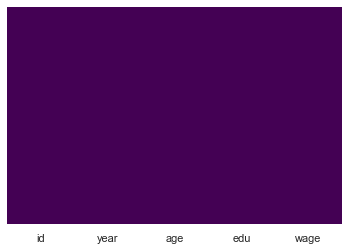

In [18]:
# show missing values (missing values - if present - will be displayed in yellow )
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can also check the column-wise distribution of null values:

In [19]:
print(df.isnull().sum())

id      0
year    0
age     0
edu     0
wage    0
dtype: int64


In this data set, there are no missing values present (which is rather unusual). 

If we observe **missing values** in the df, we can drop them all togehter with this code:

df = df.dropna()

However, be careful not to drop many observations if just one varibale is the cause for the missing values. In that case, it could be reasonable to only drop the variable: 

df = df.drop('variable', axis=1)

## Transform data

### Descriptive statistics

#### Measures of central tendency

First of all we obtain some common statistics per variable.

In [20]:
# mode
df['age'].mode()

0    40
dtype: int64

In [21]:
# calculation of the mean (e.g. for age)
age_mean = df["age"].mean()
print(age_mean)

42.41466666666667


In [22]:
# calculation of the mean (e.g. for age)
age_mean = df["age"].mean()

# calculation of the median (e.g. for age)
age_median =  df["age"].median()

# print the result (e.g., age_mean)
print(f'The precise mean of age is {age_mean}')

# print the rounded result
print(f'The rounded mean of age is {round(age_mean)}')

# print the round result (to two decimals) (this is the preferred option)
print(f'The rounded mean of age with two decimals is {round(age_mean, 2)}')

# use a function inside print()
print(f'The median of age is {df["age"].median()}')

The precise mean of age is 42.41466666666667
The rounded mean of age is 42
The rounded mean of age with two decimals is 42.41
The median of age is 42.0


#### Measures of dispersion 

In [23]:
# quantiles
df['age'].quantile([.25, .5, .75])

0.25    33.75
0.50    42.00
0.75    51.00
Name: age, dtype: float64

In [24]:
# Range
df['age'].max() - df['age'].min()

62

In [25]:
# standard deviation
round(df['age'].std(),2)

11.54

#### Summary statistics

In [26]:
# summary statistics for all numerical columns
round(df.describe(),2)

age     wage
count  3000.00  3000.00
mean     42.41   111.70
std      11.54    41.73
min      18.00    20.09
25%      33.75    85.38
50%      42.00   104.92
75%      51.00   128.68
max      80.00   318.34

In [27]:
# summary statistics for all categorical columns
df.describe(include=['category'])

id  year         edu
count   3000  3000        3000
unique  3000     7           5
top     7373  2003  2. HS Grad
freq       1   513         971

Compare summary statistics for specific groups in the data:

In [28]:
# summary statistics by groups
df['age'].groupby(df['edu']).describe()

count       mean        std   min   25%   50%    75%   max
edu                                                                           
1. < HS Grad        268.0  41.794776  12.611111  18.0  33.0  41.5  50.25  75.0
2. HS Grad          971.0  42.217302  12.023480  18.0  33.0  42.0  50.00  80.0
3. Some College     650.0  40.887692  11.523327  18.0  32.0  40.0  49.00  80.0
4. College Grad     685.0  42.773723  10.902406  22.0  34.0  43.0  51.00  76.0
5. Advanced Degree  426.0  45.007042  10.263468  25.0  38.0  44.0  53.00  76.0

## Visualize data

### Distibution of Variables

How you visualize the distribution of a variable will depend on whether the variable is categorical or continuous. A variable is categorical if it can only take one of a small set of values. To examine the distribution of a categorical variable, use a bar or count plot. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable: 

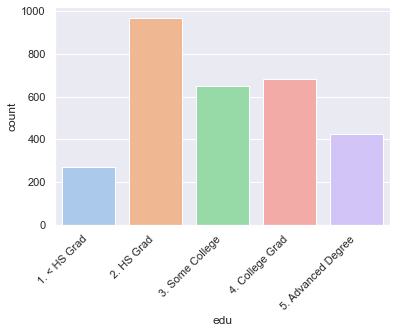

In [29]:
# count plot (show the counts of observations in each categorical bin)
# plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='edu', palette='pastel');
plt.xticks(rotation=45, ha="right");

A variable is **continuous** if it can take any of an infinite set of ordered values. Numbers and date-times are two examples of continuous variables. 

To examine the distribution of a continuous variable, use a **histogram** (a histogram divides the x-axis into equally spaced bins and then uses the height of a bar to display the number of observations that fall in each bin). 

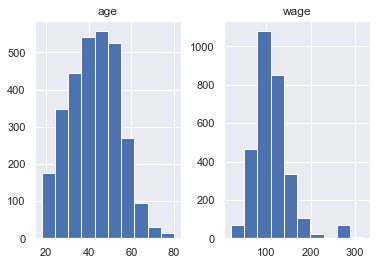

In [30]:
# Histogram of all numerical values
df.hist();

Matplotlib histogram of age for different edu-levels  (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)


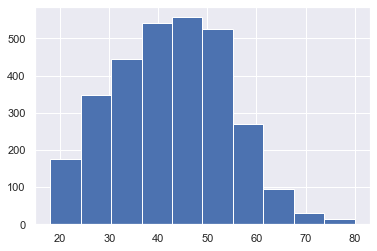

In [31]:
# Matplotlib histogram for one variable
df.age.hist();

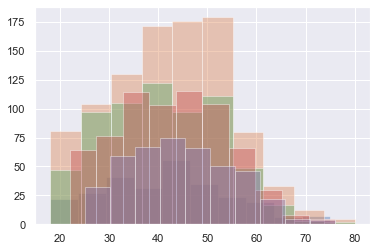

In [32]:
# Matplotlib histogram with groups
df.groupby('edu').age.hist(alpha=0.4);

Seaborne shows a default plot with a kernel density estimate and histogram with bin size determined automatically with a reference rule:

/Users/jankirenz/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


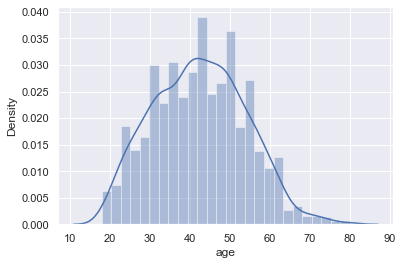

In [33]:
# histogram with seaborn 
#plt.figure(figsize=(10, 4))
sns.distplot(df.age);

Another alternative to display the distribution of a continuous variable broken down by a categorical variable is the **boxplot**. A boxplot is a type of visual shorthand for a distribution of values that is popular among statisticians. Each boxplot consists of:

A box that stretches from the 25th percentile of the distribution to the 75th percentile, a distance known as the interquartile range (IQR). In the middle of the box is a line that displays the median, i.e. 50th percentile, of the distribution. These three lines give you a sense of the spread of the distribution and whether or not the distribution is symmetric about the median or skewed to one side.

Visual points that display observations that fall more than 1.5 times the IQR from either edge of the box. These outlying points are unusual so are plotted individually.

A line (or whisker) that extends from each end of the box and goes to the
farthest non-outlier point in the distribution.

<AxesSubplot:>

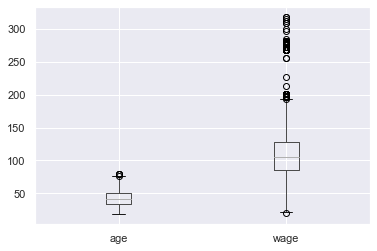

In [34]:
# Matplotlib boxplot
df.boxplot()

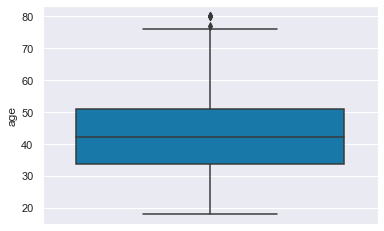

In [35]:
# boxplot 
sns.boxplot(y='age',data=df,palette='winter');

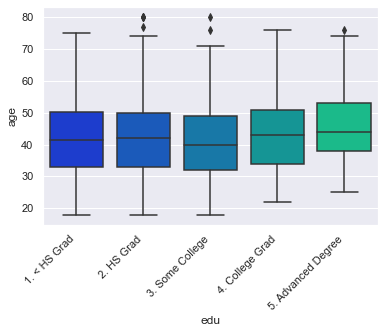

In [36]:
# boxplot for different groups
sns.boxplot(x='edu',y='age',data=df,palette='winter')
plt.xticks(rotation=45, ha="right");

We see much less information about the distribution, but the boxplots are much more compact so we can more easily compare them (and fit more on one plot).

### Relationship between variables

A great way to visualise the covariation between two continuous variables is to draw scatterplot. You can see covariation as a pattern in the points. We will cover more options to test for relationships in variables (e.g., correlation) in the following applications. 

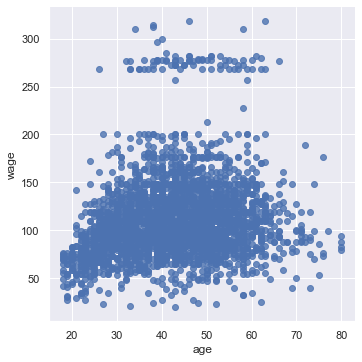

In [39]:
sns.lmplot(x='age', y='wage', data=df, fit_reg=False);

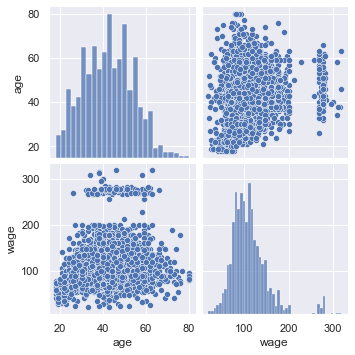

In [38]:
sns.pairplot(df);

## Model

We cover the modelling process in other applications.